## Fourier Transform of Heat Equation

$$
\begin{aligned}
u_{t}&=\alpha^{2} u_{x x} \\
\frac{d}{d t} \hat{u}&=-\omega^{2} \alpha^{2} \hat{u} \\
\hat{u}(\omega, t)&=\underbrace{e^{-\omega^{2}\alpha^{2}t}}_{\text {Gaussian }} \hat{u}(\omega, 0)\\
u(x,t) &= \mathcal{F}^{-1}(\hat{u}(\omega, t))\\
&=\underbrace{\mathcal{F}^{-1}(e^{-\omega^{2}\alpha^{2}t})}_{\text {Gaussian }}*\underbrace{u(\omega, 0)}_{\text{init. cond.}}
\end{aligned}
$$

`fftfreq` returns you an array of **frequencies** not amplitudes. You get the **amplitudes** from `fft`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams.update({'font.size': 18})

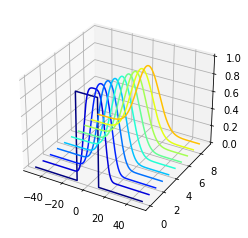

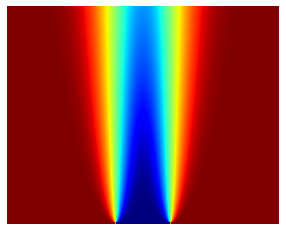

In [10]:
a = 2.05
L = 100
N = 1000
dx = L/N
x = np.arange(-L/2,L/2,dx)
# discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N,d=dx)
# initial condition
u0 = np.zeros_like(x)
u0[int((L/2-L/10)/dx):int((L/2+L/10)/dx)] = 1
u0hat = np.fft.fft(u0)
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))
# simulate in Fourrier space
dt = 0.1
t = np.arange(0,10,dt)
def rhsHeat(uhat_ri,t,kappa,a):
    uhat = uhat_ri[:N] + 1j*uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa,2)) * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri
uhat_ri = odeint(rhsHeat,u0hat_ri,t,args=(kappa,a))
uhat = uhat_ri[:,:N] + 1j*uhat_ri[:,N:]
# convert to real space
u = np.zeros_like(uhat)
for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])
u = np.real(u)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
plt.set_cmap('jet_r')
u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:],color=cm.jet(j*20))
plt.figure()
plt.imshow(np.flipud(u),aspect=8)
plt.axis('off')
plt.set_cmap('jet_r')
plt.show()

In [12]:
kappa.shape

(1000,)

https://www.youtube.com/watch?v=mMdIxa5qC9Y

https://www.youtube.com/watch?v=hDeARtZdq-U

## Understand Fourier Transform 

A sine wave can be represented by the following equation:
$$
y(t)=A \sin (\omega t+\phi)
$$
where $A$ is the amplitude of the wave, $\omega$ is the angular frequency, which specifies how many cycles occur in a second, in radians per second. $\phi$ is the phase of the signal. If $T$ is the period of the wave, and $f$ is the frequency of the wave, then $\omega$ has the following relationship to them:
$$
\omega=\frac{2 \pi}{T}=2 \pi f
$$

We can model a single wave as a field with a function $F(x,t)$, where $x$ is the location of a point in space, while $t$ is the time. One simplest case is the shape of a sine wave change over $x$.

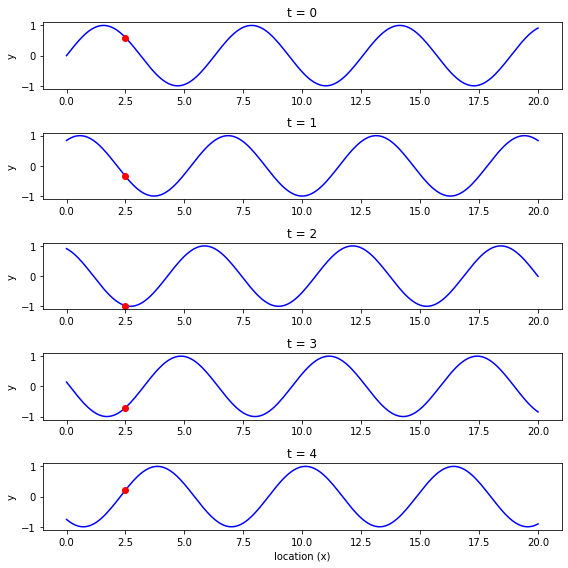

In [4]:
x = np.linspace(0, 20, 201)
fig = plt.figure(figsize = (8,8))
times = np.arange(5)
n = len(times)
for t in times:
    plt.subplot(n, 1, t+1)
    y = np.sin(x + t)
    plt.plot(x, y, 'b')
    plt.plot(x[25], y [25], 'ro')
    plt.ylim(-1.1, 1.1)
    plt.ylabel('y')
    plt.title(f't = {t}')

plt.xlabel('location (x)')
plt.tight_layout()
plt.show()

Generate two sine waves with time between 0 and 1 seconds and frequency is 5 Hz and 10 Hz, all sampled at 100 Hz. Plot the two waves and see the difference. Count how many cycles in the 1 second. 

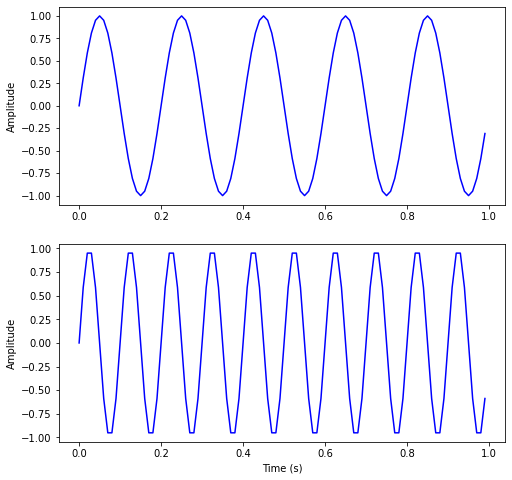

In [8]:
# sampling rate
sr = 100.0
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# frequency of the signal
freq = 5   
y = np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

freq = 10   
y = np.sin(2*np.pi*freq*t)

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

- [Nyquist Theorem Simulator](https://resources.nerdfirst.net/sampling)
- [Sampling, Aliasing & Nyquist Theorem](https://www.youtube.com/watch?v=yWqrx08UeUs)

Using the DFT, we can compose a complicated signal to a series of sinusoids and each of them will have a different frequency. The following 3D figure shows the idea behind the DFT, that the above signal is actually the results of the sum of 3 different sine waves. The time domain signal, which is the above signal we saw can be transformed into a figure in the frequency domain called DFT amplitude spectrum, where the signal frequencies are showing as vertical bars. The height of the bar after normalization is the amplitude of the signal in the time domain. You can see that the 3 vertical bars are corresponding the 3 frequencies of the sine wave, which are also plotted in the figure.

![](./images/time_frequency.png)